## 1. Importing Libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Using TensorFlow backend.


## 2. Importing Dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [9]:
no_rows = X_train.shape[1]

In [10]:
no_cols = X_train.shape[2]

## 3. Reshaping Input Data

<p>I am considering the data in the form of 2D images (28x28 pixels) instead of a flattened stream of 784 pixels. As, we have greyscale images so dimension of color will be set to 1. Resultant data would be of the form <b>(60000*28 * 28 * 1)</b>, where 1 signifies greyscale images and 60000 signifies total number of instances in training set.</p>


In [11]:
X_train = X_train.reshape(X_train.shape[0],no_rows,no_cols,1)

In [12]:
X_train.shape

(60000, 28, 28, 1)

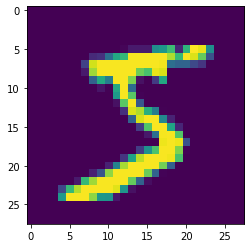

In [13]:
# Digit at 0th index of Features Training set
plt.imshow(X_train[0])

In [14]:
# Pixel values for corresponding digit at 0th index of Features Training set
X_train[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [15]:
X_test = X_test.reshape(X_test.shape[0],no_rows,no_cols,1)


In [16]:
X_test.shape

(10000, 28, 28, 1)

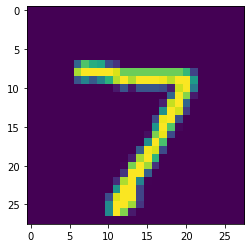

In [17]:
# Digit at 0th index of Features Test set
plt.imshow(X_test[0])

In [18]:
# Pixel values for corresponding digit at 0th index of Features Test set
X_test[0]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [19]:
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

In [20]:
image_shape = (no_rows, no_cols,1)
image_shape

(28, 28, 1)

## Normalizing Data
<p> As we have pixel values from 0 to 255, so, I am normalizing feature data (X_train and X_test) by dividing each pixel value with maximum possible pixel value. </p>

In [21]:
X_train = X_train/255
X_test = X_test/255

<b> EXPLANATION </b>
<p> Instaed of using <b>MinMaxScalar</b> for Normalizing feature data, I have divided all the pixel values by maximum pixel value (i.e, 255), because <b>MinMaxScalar</b> requires a 2-D array to normalize data. However, I have previously reshaped the data into 28 * 28 *1 form.</p>

In [22]:
# Normalized pixel values of digit located at 0th index of Features Training set
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

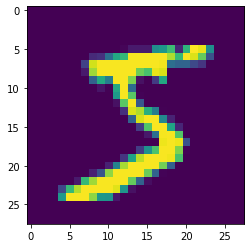

In [23]:
plt.imshow(X_train[0])

In [24]:
y_test_confusion_matrix = y_test

## 4. Converting train and test labels in One-Hot Encoding format

In [25]:
from keras.utils import np_utils
y_train= np_utils.to_categorical(y_train)

In [26]:
y_train.shape

(60000, 10)

In [27]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
y_test= np_utils.to_categorical(y_test)

In [29]:
y_test.shape

(10000, 10)

In [30]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [31]:
no_of_labels = y_train.shape[1]
no_of_labels

10

In [32]:
no_pixels = X_train.shape[1] * X_train.shape[2]
no_pixels

784

## 5. Print out one of the training images with its label.

<p><b>a. Visualizing any random image.</b> </p>

Text(0.5, 1.0, 'Label: 4')

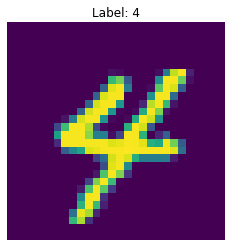

In [33]:
plt.imshow(X_train[131]) 
label = str(np.where(y_train[131]==1))
plt.axis("off")
plt.title('Label: {}'.format(label[8:9]))

<b>b. Visualizing sequence of images with their labels.</b>

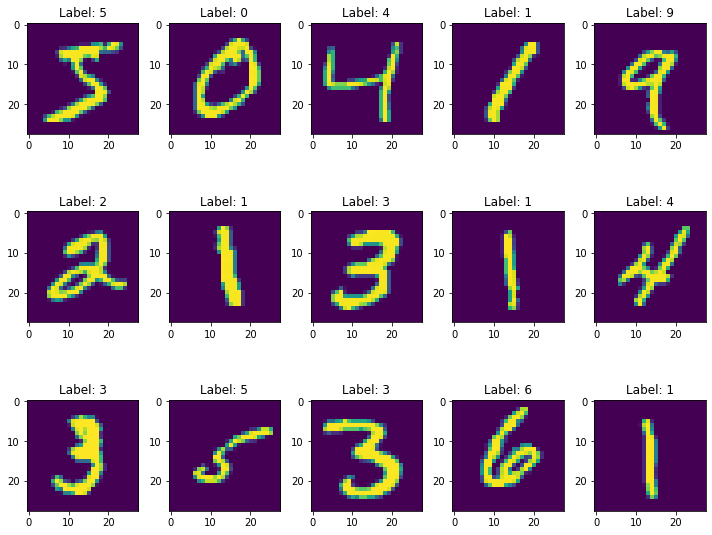

In [34]:
no_row = 3
no_col = 5

# fetching few images from entire dataset
few_images = X_train[:no_row * no_col]

fig, axes = plt.subplots(no_row, no_col, figsize=(10,8))
for i in range(no_row*no_col):
    ax = axes[i//no_col, i%no_col]
    label = str(np.where(y_train[i]==1))
    ax.imshow(few_images[i])
    ax.set_title('Label: {}'.format(label[8:9]))
plt.tight_layout()
plt.show()